In [ ]:
# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
Done: The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Done: Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Done: Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [10]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


Best Single-Variable Model:  bmi 

Slope:  949.4352603840388  t-stat:  15.187289570365307 

Intercept:  152.13348416289617  t-stat:  2.4335469449448426 

RSS:  1719581.8107738825 

RSE:  62.51512200285265 

MSE:  3890.456585461273 

R2 0.3439237602253802 



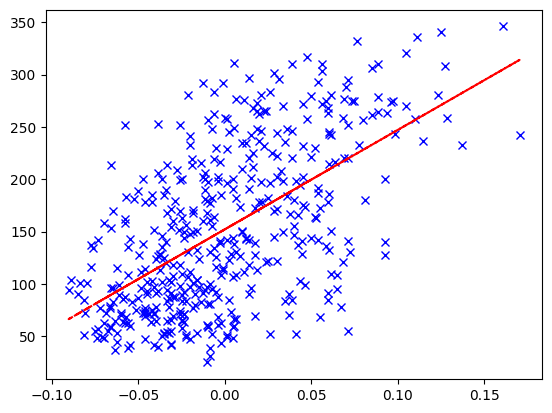

In [27]:
# Part 2: Single variable linear models
# initialize models
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns
xcols = len(var_names)
rbest = [0,0]
yhat = [] #np.ndarray((1,xcols),np.ndarray)
resid = []
R2 = []
RSS = []
MSE = []
RSE = []
for i in range(xcols):
  # select first variable
  var_name1 = var_names[i]

  # select data associated with the first variable
  x1 = X[var_name1]

  # turn that dataframe column into a nx1 numpy array
  x1_data = np.array([x1.to_numpy()]).T

  # fit model
  _ = model.fit(x1_data,y.to_numpy())

  # get model predictions for each x value
  yhat.append(model.predict(x1_data))  # what type is model.predict output and how do i make an array/list of it

  # get residuals
  resid.append(yhat[i]-y)

  # get RSS
  RSS.append(np.sum(resid[i]**2))

  # get MSE
  MSE.append(RSS[i]/(len(resid[i])))

  # get RSE
  RSE.append(np.sqrt(RSS[i]/(len(resid[i])-2)))

  # get R2 value, and store highest R^2 so far
  R2.append(model.score(x1_data,y))
  if R2[i] > rbest[1]:
    rbest = [i,R2[i]]
    bestslope = model.coef_
    bestint = model.intercept_
    tslope = bestslope/RSE[i]
    tint = bestint/RSE[i]
    bestname = var_name1

print('Best Single-Variable Model: ',bestname,'\n')
print('Slope: ',bestslope[0],' t-stat: ',tslope[0],'\n')
print('Intercept: ',bestint,' t-stat: ',tint,'\n')
print('RSS: ',RSS[rbest[0]],'\n')
print('RSE: ',RSE[rbest[0]],'\n')
print('MSE: ',MSE[rbest[0]],'\n')
print('R2', rbest[1],'\n')


x1 = X[var_names[rbest[0]]]
# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yhat[rbest[0]], ls='--', color='red')

In [44]:
# Part 3: Multi-variable linear model & Part 4: Information Content Assessment
xin = X[var_names]
myhat = [] #np.ndarray((1,xcols),np.ndarray)
mresid = []
mR2 = []
mRSS = []
mMSE = []
mRSE = []
# turn that dataframe column into a nx1 numpy array
xin_data = xin.to_numpy()

# fit model
_ = model.fit(xin_data,y.to_numpy())

# get model predictions for each x value
myhat = model.predict(xin_data)  

# get residuals
mresid = (myhat-y)

# get RSS
mRSS = np.sum(mresid**2)

# get MSE
mMSE = mRSS/(len(mresid))

# get RSE
mRSE = np.sqrt(mRSS/(len(mresid)-xcols-1))

# get TSS
mTSS = np.sum((model.intercept_-y)**2)

# get R2 value
mR2 = model.score(xin_data,y)

# get overall F statistic
fstat = ((mTSS-mRSS)/xcols)/((mRSS/(len(mresid)-xcols-1)))

# get coefficient F statistics
coeffs = model.coef_
intercept = model.intercept_
fs = [0.0] * len(coeffs)
for i in range(len(coeffs)):
  xin1 = X[var_names[i]]
  xin1_data = xin1.to_numpy()
  ryhat = coeffs[i]*xin1_data+intercept
  rresid = ryhat-y
  rRSS = np.sum(rresid**2)
  fs[i]= ((rRSS-mRSS)/(xcols-1))/((mRSS/(len(rresid)-xcols-1)))



print('Multivariate Linear Model Coefficients & F-statistics:\n')
for j in range(len(var_names)):
  print(var_names[j],': ',coeffs[j],' f=',fs[j])

print('Intercept: ',intercept,'\n')
print('Overall F-stat: ',fstat,'\n')
print('RSS: ',mRSS,'\n')
print('RSE: ',mRSE,'\n')
print('MSE: ',mMSE,'\n')
print('R2', mR2,'\n')

Multivariate Linear Model Coefficients & F-statistics:

age :  -10.009866299810781  f= 51.64833830450429
sex :  -239.8156436724227  f= 54.859633099982865
bmi :  519.8459200544603  f= 24.253230230777593
bp :  324.3846455023238  f= 37.83221208819918
s1 :  -792.1756385522324  f= 95.79405560148322
s2 :  476.73902100525805  f= 49.845468466026105
s3 :  101.04326793803467  f= 56.69425238794992
s4 :  177.0632376713476  f= 43.251654552544274
s5 :  751.2736995571041  f= 20.644574507152768
s6 :  67.62669218370502  f= 48.41396541166811
Intercept:  152.13348416289597 

Overall F-stat:  46.27243958524321 

RSS:  1263985.7856333435 

RSE:  54.15423932805569 

MSE:  2859.69634758675 

R2 0.5177484222203499 



The best single-variable model does not match up with the variable with the highest f-statistic, in fact BMI has a fairly low f-statistic relative to most other independent variables. This may be due to correlation between independent variables, meaning that they are not truly independent. For example, if several variables combine in a multivariate model to produce a well-fitting model, but each has a relatively small contribution to the model on its own, a different individual variable with slightly more contribution may perform better in a single variable model but will not outweigh the information content of the several variables combined in the multivariate model.

Best Single-Variable Model:  bmi 

Slope:  961.1049341358807  t-stat:  15.458423487552826 

Intercept:  151.9038020253561  t-stat:  2.4432226052284034 
Training set statistics & plot:

RSS:  1271765.7071689484
RSE:  62.17354149404469
MSE:  3842.192468788364
R2 0.3615738533829532 

Best Single-Variable Model Applied to Test set:

RSS:  463912.4187185536
RSE:  65.23861767350711
MSE:  4179.391159626609
R2 0.2622520740719402


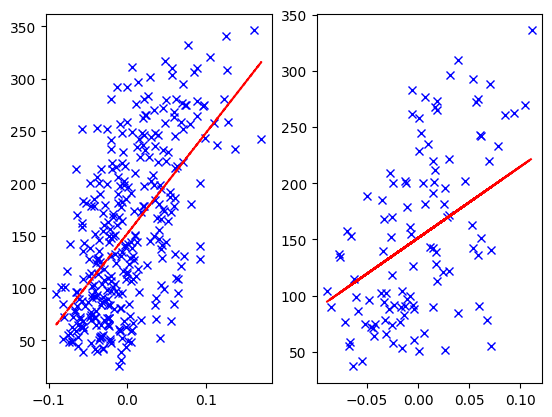

In [60]:
from sklearn.model_selection import train_test_split

# Part 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Part 2 repeat: Single variable linear models
# initialize models
model = LinearRegression()

trainx = X_train.to_numpy().T
trainy = y_train.to_numpy()

testx = X_test.to_numpy().T
testy = y_test.to_numpy()

rbest = [0,0]
yhat = [] #np.ndarray((1,xcols),np.ndarray)
resid = []
R2 = []
RSS = []
MSE = []
RSE = []
for i in range(xcols):
  # model independent variable
  _ = model.fit(np.reshape(trainx[i],(-1,1)),trainy)

  # get model predictions for each x value
  yhat.append(model.predict(np.reshape(trainx[i],(-1,1))))  

  # get residuals
  resid.append(yhat[i]-trainy)

  # get RSS
  RSS.append(np.sum(resid[i]**2))

  # get MSE
  MSE.append(RSS[i]/(len(resid[i])))

  # get RSE
  RSE.append(np.sqrt(RSS[i]/(len(resid[i])-2)))

  # get training set R2 value, and store highest R^2 so far
  R2.append(model.score(np.reshape(trainx[i],(-1,1)),trainy))
  if R2[i] > rbest[1]:
    rbest = [i,R2[i]]
    bestslope = model.coef_
    bestint = model.intercept_
    tslope = bestslope/RSE[i]
    tint = bestint/RSE[i]
    bestname = var_names[i]

print('Best Single-Variable Model: ',bestname,'\n')
print('Slope: ',bestslope[0],' t-stat: ',tslope[0],'\n')
print('Intercept: ',bestint,' t-stat: ',tint,'\nTraining set statistics & plot:\n')
print('RSS: ',RSS[rbest[0]])
print('RSE: ',RSE[rbest[0]])
print('MSE: ',MSE[rbest[0]])
print('R2', rbest[1],'\n')

xbest = np.reshape(trainx[rbest[0]],(-1,1))
# make a plot
plt.subplot(1,2,1)

# plot data
plt.plot(xbest, trainy, marker='x', lw=0, color='blue')

# plot fit
plt.plot(xbest, yhat[rbest[0]], ls='--', color='red')


# Calculations of QOF for test set
rbest = [0,0]
yhat = [] #np.ndarray((1,xcols),np.ndarray)
resid = []
R2 = []
RSS = []
MSE = []
RSE = []
for i in range(xcols):
  # get model predictions for each x value in test set
  yhat.append(model.predict(np.reshape(testx[i],(-1,1))))  

  # get residuals
  resid.append(yhat[i]-testy)

  # get RSS
  RSS.append(np.sum(resid[i]**2))

  # get MSE
  MSE.append(RSS[i]/(len(resid[i])))

  # get RSE
  RSE.append(np.sqrt(RSS[i]/(len(resid[i])-2)))

  # get training set R2 value, and store highest R^2 so far
  R2.append(model.score(np.reshape(testx[i],(-1,1)),testy))
  if R2[i] > rbest[1]:
    rbest = [i,R2[i]]
    bestslope = model.coef_
    bestint = model.intercept_
    tslope = bestslope/RSE[i]
    tint = bestint/RSE[i]
    bestname = var_names[i]

print('Best Single-Variable Model Applied to Test set:\n')
print('RSS: ',RSS[rbest[0]])
print('RSE: ',RSE[rbest[0]])
print('MSE: ',MSE[rbest[0]])
print('R2', rbest[1])

xbest = np.reshape(testx[rbest[0]],(-1,1))
# make a plot
plt.subplot(1,2,2)

# plot data
plt.plot(xbest, testy, marker='x', lw=0, color='blue')

# plot fit
plt.plot(xbest, yhat[rbest[0]], ls='--', color='red')



For the single variable model, the R2 dropped by 0.1 from the training to test sets, while the RSE remained quite similar. The explanation for this behavior is not as clear as in the multivariate model below, since over-fitting is unlikely to be an issue with a single-variable model. In this case, with a relatively small sample size, the change in R2 is possibly due to the particular random selection of the test and training sets (the values do change every time you run the program, since the data are randomly split each time it runs).

In [66]:
# Part 3 repeat: Multi-variable linear model & Part 4: Information Content Assessment
myhat = [] #np.ndarray((1,xcols),np.ndarray)
mresid = []
mR2 = []
mRSS = []
mMSE = []
mRSE = []

trainx = X_train.to_numpy()
testx = X_test.to_numpy()

# fit model
_ = model.fit(trainx,trainy)

# get model predictions for each x value
myhat = model.predict(trainx)  

# get residuals
mresid = (myhat-trainy)

# get RSS
mRSS = np.sum(mresid**2)

# get MSE
mMSE = mRSS/(len(mresid))

# get RSE
mRSE = np.sqrt(mRSS/(len(mresid)-xcols-1))

# get TSS
mTSS = np.sum((model.intercept_-trainy)**2)

# get R2 value
mR2 = model.score(trainx,trainy)

# get overall F statistic
fstat = ((mTSS-mRSS)/xcols)/((mRSS/(len(mresid)-xcols-1)))

# get coefficient F statistics
coeffs = model.coef_
intercept = model.intercept_
fs = [0.0] * len(coeffs)
for i in range(len(coeffs)):
  xin1 = trainx.T[i]
  ryhat = coeffs[i]*xin1+intercept
  rresid = ryhat-trainy
  rRSS = np.sum(rresid**2)
  fs[i]= ((rRSS-mRSS)/(xcols-1))/((mRSS/(len(rresid)-xcols-1)))



print('Multivariate Linear Model Coefficients & F-statistics:\n')
for j in range(len(var_names)):
  print(var_names[j],': ',coeffs[j],' f=',fs[j])

print('Intercept: ',intercept,'\n')
print('Overall F-stat: ',fstat,'\n')
print('RSS: ',mRSS)
print('RSE: ',mRSE)
print('MSE: ',mMSE)
print('R2', mR2,'\n')

# Get stats for test set
myhat = [] #np.ndarray((1,xcols),np.ndarray)
mresid = []
mR2 = []
mRSS = []
mMSE = []
mRSE = []

# get model predictions for each x value
myhat = model.predict(testx)  

# get residuals
mresid = (myhat-testy)

# get RSS
mRSS = np.sum(mresid**2)

# get MSE
mMSE = mRSS/(len(mresid))

# get RSE
mRSE = np.sqrt(mRSS/(len(mresid)-xcols-1))

# get TSS
mTSS = np.sum((model.intercept_-testy)**2)

# get R2 value
mR2 = model.score(testx,testy)

# get overall F statistic
fstat = ((mTSS-mRSS)/xcols)/((mRSS/(len(mresid)-xcols-1)))

# get coefficient F statistics
coeffs = model.coef_
intercept = model.intercept_
fs = [0.0] * len(coeffs)
for i in range(len(coeffs)):
  xin1 = testx.T[i]
  ryhat = coeffs[i]*xin1+intercept
  rresid = ryhat-testy
  rRSS = np.sum(rresid**2)
  fs[i]= ((rRSS-mRSS)/(xcols-1))/((mRSS/(len(rresid)-xcols-1)))



print('Multivariate Linear Model Coefficients & Statistics for Test Set:\n')
for j in range(len(var_names)):
  print(var_names[j],': ',coeffs[j],' f=',fs[j])

print('Intercept: ',intercept,'\n')
print('Overall F-stat: ',fstat,'\n')
print('RSS: ',mRSS,)
print('RSE: ',mRSE,)
print('MSE: ',mMSE,)
print('R2', mR2,'\n')

Multivariate Linear Model Coefficients & F-statistics:

age :  -6.028794488795985  f= 40.31630641643001
sex :  -254.8290323065344  f= 42.68413336292853
bmi :  526.702352197928  f= 18.415820641791093
bp :  314.53743244634467  f= 30.54995098515359
s1 :  -618.7234813047602  f= 64.98226649672726
s2 :  311.80534889174777  f= 37.45781516075001
s3 :  14.880148464972761  f= 40.779099737407435
s4 :  183.69332224813522  f= 33.54414783397252
s5 :  665.0409999805596  f= 17.03969955235675
s6 :  94.01600526333294  f= 37.15652859091922
Intercept:  152.25860935637147 

Overall F-stat:  36.19419074962666 

RSS:  934791.5665310229
RSE:  54.04834544562346
MSE:  2824.143705531791
R2 0.5307348088202286 

Multivariate Linear Model Coefficients & Statistics for Test Set:

age :  -6.028794488795985  f= 10.030073051924978
sex :  -254.8290323065344  f= 11.188265406435763
bmi :  526.702352197928  f= 4.974678870670986
bp :  314.53743244634467  f= 6.753823733172679
s1 :  -618.7234813047602  f= 15.244485571114005
s

In the case of the multivariate model, the RSE and R2 were slightly worse when the model was applied to the test set as opposed to the training set. This is generally to be expected, especially for a model with a fairly large number of parameters (in this case 10), which can lead to over-fitting on the training data and failing to properly model the test data.